In [135]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
edges = pd.read_csv('musae_DE_edges.csv')
nodes = pd.read_csv('musae_DE_target.csv')

In [137]:
print('Nodes dataset dimension:', nodes.shape, '\nEdges dataset dimension:', edges.shape)

Nodes dataset dimension: (9498, 6) 
Edges dataset dimension: (153138, 2)


# 1. Exploring the data

In [138]:
nodes.head()

,id,days,mature,views,partner,new_id
0,37905227,2149,True,162078,False,5079
1,63102384,1574,True,1370,False,4281
2,109414094,1034,True,6043,False,992
3,84163849,1319,True,94298,True,9021
4,38240837,2137,True,2323,False,330


In [144]:
edges.head()

,from,to
0,0,9206
1,0,7787
2,0,2145
3,0,2684
4,0,7275


In [146]:
edges.describe()

,from,to
count,153138.000000,153138.000000
mean,3672.458103,6060.992510
std,2511.565127,2437.219301
min,0.000000,5.000000
25%,1613.000000,4150.000000
50%,3173.000000,6619.000000
75%,5519.000000,8080.000000
max,9488.000000,9497.000000


We can see from here that it uses new_id instead of id so we will drop id collumn and only use new_id

In [147]:
nodes.drop("id", axis=1, inplace=True)

In [148]:
nodes.rename(columns = {'new_id':'id'}, inplace = True)

In [149]:
nodes.head()

,days,mature,views,partner,id
0,2149,1,162078,0,5079
1,1574,1,1370,0,4281
2,1034,1,6043,0,992
3,1319,1,94298,1,9021
4,2137,1,2323,0,330


In [150]:
nodes.isnull().sum()

days       0
mature     0
views      0
partner    0
id         0
dtype: int64

In [151]:
edges.isnull().sum()

from    0
to      0
dtype: int64

There are no NAN values in dataset

In [141]:
nodes.dtypes

id         int64
days       int64
mature      bool
views      int64
partner     bool
new_id     int64
dtype: object

In [142]:
#correcting datatypes

nodes.mature = nodes.mature.astype(int)
nodes.partner = nodes.partner.astype(int)

In [143]:
nodes.dtypes

id         int64
days       int64
mature     int64
views      int64
partner    int64
new_id     int64
dtype: object

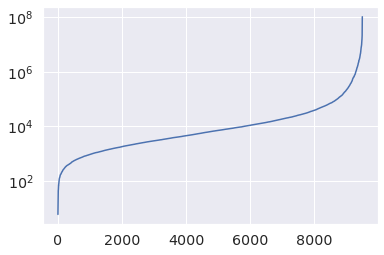

In [152]:
nodes_views = nodes.sort_values(by = ['views'])
views = nodes_views['views']
views = views.reset_index()
plt.plot(views['views'])
plt.yscale("log")
plt.title("")
plt.xlabel("sorted nodes (streamers)")
plt.ylabel("Views on Twitch")

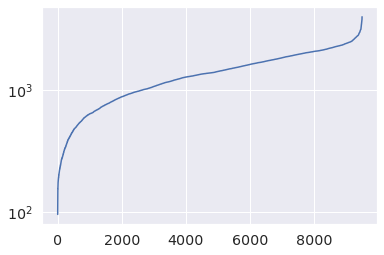

In [154]:
nodes_days = nodes.sort_values(by = ['days'])
days = nodes_days['days']
days = days.reset_index()
plt.plot(days['days'])
plt.yscale("log")
plt.xlabel("sorted nodes (streamers)")
plt.ylabel("Days on Twitch")

In [155]:
nodes.set_index('id')

,days,mature,views,partner
id,,,,
5079,2149,1,162078,0
4281,1574,1,1370,0
992,1034,1,6043,0
9021,1319,1,94298,1
330,2137,1,2323,0
...,...,...,...,...
4572,895,1,128,0
6355,2001,0,44,0
206,1784,1,2038,0


#2) Graph analysis

In [156]:
nodes_dict = nodes.to_dict('index')

In [157]:
G_unweighted_undirected = nx.from_pandas_edgelist(edges, source='from', target='to')
nx.set_node_attributes(G_unweighted_undirected, nodes_dict)

In [158]:
nx.classes.function.density(G_unweighted_undirected) #edge detsity

0.0033954267301620203

In [159]:
nx.transitivity(G_unweighted_undirected)

0.0464708891573653


In [160]:
nx.average_shortest_path_length(G_unweighted_undirected) #avarage shortest path lenght

2.7215711057961074

In [161]:
nx.average_clustering(G_unweighted_undirected) #clustering coefficient


0.2008857266932269

In [162]:
nx.diameter(G_unweighted_undirected) #diameter of the graph

7

In [166]:
nx.betweenness_centrality(G_unweighted_undirected) #betweenness centrality

KeyboardInterrupt: ignored

# 3) Attribute analysis 

[Text(0.5, 1.0, 'Correlation heatmap')]

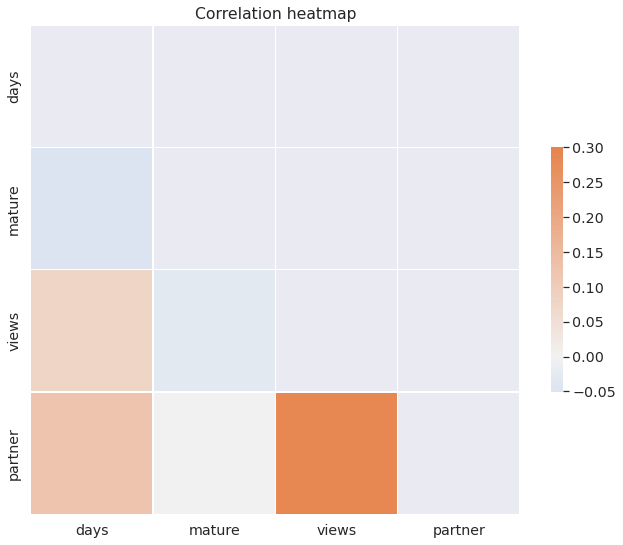

In [165]:
# Calculating Correlation

corr = nodes[['days','mature','views','partner']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio

p = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
p.set(title = "Correlation heatmap")
